In [56]:
from pprint import pprint
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from pylab import *
import keyword


from plotly.subplots                       import make_subplots
from sklearn.decomposition                 import TruncatedSVD,PCA
from sklearn.feature_extraction.text       import CountVectorizer
nltk.download('vader_lexicon')
from sklearn.cluster                       import KMeans
from nltk.sentiment.vader                  import SentimentIntensityAnalyzer as SIA
from wordcloud                             import WordCloud,STOPWORDS
from pandas.plotting                       import autocorrelation_plot
from statsmodels.graphics.tsaplots         import plot_acf
from statsmodels.graphics.tsaplots         import plot_pacf
from statsmodels.tsa.seasonal              import seasonal_decompose
from statsmodels.tsa.ar_model              import AR,AutoReg
from statsmodels.tsa.statespace.sarimax    import SARIMAX
from nltk.util                             import ngrams
from nltk                                  import word_tokenize
from nltk.stem                             import PorterStemmer
from nltk.stem                             import WordNetLemmatizer
from wordcloud                             import STOPWORDS
from tqdm                                  import tqdm


plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

In [57]:
df = pd.read_csv('nyt_10yrs.csv')
df_headline = df[['date', 'headline']]

# Create a Datetime index
import datetime
df_headline['date'] = pd.to_datetime(df_headline['date'])


df_headline['year']         = pd.DatetimeIndex(df_headline['date']).year
df_headline['month']        = pd.DatetimeIndex(df_headline['date']).month
df_headline['day_of_week']  = pd.DatetimeIndex(df_headline['date']).day_name()
df_headline['day']          = pd.DatetimeIndex(df_headline['date']).day
df_headline['day_of_year']  = pd.DatetimeIndex(df_headline['date']).dayofyear
df_headline['quarter']      = pd.DatetimeIndex(df_headline['date']).quarter
df_headline['season']       = df_headline.month%12 // 3 + 1

df_headline.head()

<ipython-input-57-f5822f2b3a10>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_headline['date'] = pd.to_datetime(df_headline['date'])
<ipython-input-57-f5822f2b3a10>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_headline['year']         = pd.DatetimeIndex(df_headline['date']).year
<ipython-input-57-f5822f2b3a10>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,date,headline,year,month,day_of_week,day,day_of_year,quarter,season
0,2018-12-01,Trump’s Book Club: A President Who Doesn’t Rea...,2018,12,Saturday,1,335,4,1
1,2018-12-01,Kareem Hunt Is Cut by the Chiefs After a Video...,2018,12,Saturday,1,335,4,1
2,2018-12-01,Agency Pulls Back on Its Warning Against Talk ...,2018,12,Saturday,1,335,4,1
3,2018-12-01,A China Hawk Gains Prominence as Trump Confron...,2018,12,Saturday,1,335,4,1
4,2018-12-01,Wilmer Flores Is a Met No More,2018,12,Saturday,1,335,4,1


In [58]:
yearly = df_headline.groupby(['year'], as_index = False).agg({'headline': ' '.join})
monthly = df_headline.groupby(['month'], as_index = False).agg({'headline': ' '.join})
weekly = df_headline.groupby(['day_of_week'], as_index = False).agg({'headline': ' '.join})
daily = df_headline.groupby(['day'], as_index = False).agg({'headline': ' '.join})
day_year = df_headline.groupby(['day_of_year'], as_index = False).agg({'headline': ' '.join})
quarterly = df_headline.groupby(['quarter'], as_index = False).agg({'headline': ' '.join})
seasonly = df_headline.groupby(['season'], as_index = False).agg({'headline': ' '.join})

In [59]:
print(quarterly)
print(seasonly)

   quarter                                           headline
0        1  1919: The Year of the Crack-Up In Search of Lo...
1        2  Two Arrested in Killings of Transgender Women ...
2        3  Coil Extends Bob Baffert’s Domination of the H...
3        4  Trump’s Book Club: A President Who Doesn’t Rea...
   season                                           headline
0       1  Trump’s Book Club: A President Who Doesn’t Rea...
1       2  Two Arrested in Killings of Transgender Women ...
2       3  Coil Extends Bob Baffert’s Domination of the H...
3       4  Generation Limbo: Waiting It Out F.T.C. Critic...


In [60]:
df.set_index('date', inplace=True, drop=True)

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Number of Articles'),
 Text(0.5, 1.0, 'Articles Published Every Month')]

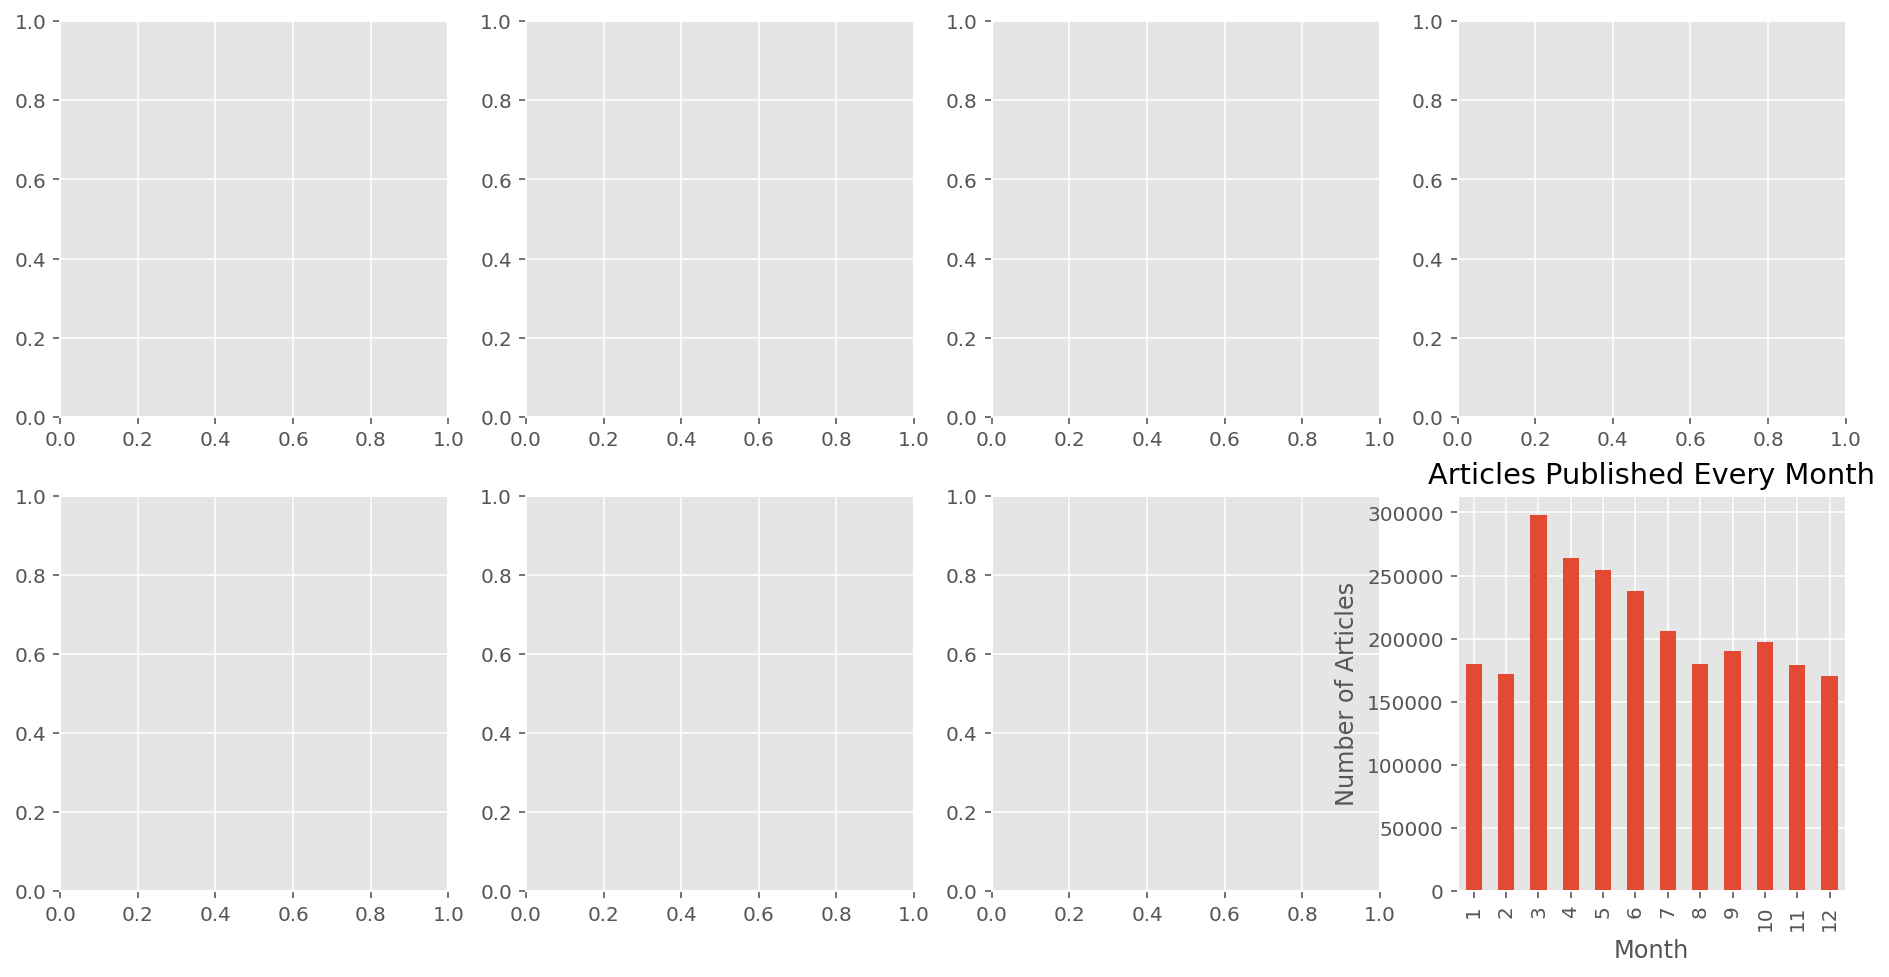

In [61]:
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

fix, ax = plt.subplots(nrows=2, ncols=4, figsize=(16,8))

ax[0,0] = df_headline.groupby(df_headline.year)['headline'].count().plot(kind='bar')
ax[0,0].set(xlabel='Year', ylabel='Number of Articles', title="Articles Published Every Year")

ax[1][0] = df_headline.groupby(df_headline.month)['headline'].count().plot(kind='bar')
ax[1][0].set(xlabel='Month', ylabel='Number of Articles', title="Articles Published Every Month")

# ax[2][0] = df_headline.groupby(df_headline.day_of_week)['headline'].count().plot(kind='bar')
# ax[2][0].set(xlabel='Week', ylabel='Number of Articles', title="Articles Published Every Week")

# ax[0][1] = df_headline.groupby(df_headline.day)['headline'].count().plot(kind='bar')
# ax[0][1].set(xlabel='Year', ylabel='Number of Articles', title="Articles Published Every Year")

# ax[1][1] = df_headline.groupby(df_headline.dat_of_year)['headline'].count().plot(kind='bar')
# ax[1][1].set(xlabel='Year', ylabel='Number of Articles', title="Articles Published Every Year")

# ax[2][1] = df_headline.groupby(df_headline.quarter)['headline'].count().plot(kind='bar')
# ax[2][1].set(xlabel='Year', ylabel='Number of Articles', title="Articles Published Every Year")



In [62]:
yearly_n1_word =[]
yearly_n2_word =[]
yearly_n3_word =[]

yearly_word_freqs = []
for year in tqdm(df_headline.year):
    F = nltk.FreqDist([i for i in ' '.join(yearly.query(f'year=={year}').text).split() if i not in STOPWORDS])
    yearly_word_freqs.append(F)
    result = [i for i in F.most_common(3)]
    yearly_n1_word.append(result[0])
    yearly_n2_word.append(result[1])
    yearly_n3_word.append(result[2])

NameError: name 'tqdm' is not defined